<a href="https://colab.research.google.com/github/mkaraca25/DataScience/blob/main/BtkAkademiDay4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
#turn off python warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
df=pd.read_csv("/content/dataSet_20220203_olimpiyatlar.csv")
df.head() #See first 5 lines

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
#data clear
df.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
#Changing column names(Sütun isimlerini değiştirme)
df.rename(columns={"ID"     : "id",
                   "Name"   : "name",
                   "Gender" : "gender",
                   "Age"    : "age",
                   "Height" : "height",
                   "Weight" : "weight",
                   "Team"   : "team",
                   "NOC"    : "noc",
                   "Games"  : "games",
                   "Year"   : "year",
                   "Season" : "season",
                   "City"   : "city",
                   "Sport"  : "sport",
                   "Event"  : "event",
                   "Medal"  : "medal"},inplace=True)
df.head(2)

,id,name,gender,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [6]:
df=df.drop(["id","games"],axis=1)
df.head(2)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [7]:
from numpy.ma.extras import unique
#lost data
#Height and weight column missing data filling(Boy ve kilo sütunu kayıp veri doldurma)
unique_event=pd.unique(df.event)
print("unique event numbers :{}".format(len(unique_event)))
unique_event[:10]

unique event numbers :765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [8]:
#loop each activity iteratively(her bir etkinliği iteratif olarak dolaş)
#calculate average height and weight for the event(etkinliğin özelinde boy ve kilo ortalamalarını hesapla
#equate the lost height and weight values ​​to their averages for the activity(etkinlik özelinde kayıp boy ve kilo değerlerini ortalamalarına eşitle)
df_temporary=df.copy() #I made a copy so as not to corrupt the real data(gerçek veriyi bozmamak için kopyasını oluşturdum)
height_weight_list=["height","weight"]
for i in unique_event:  #Cycle through list(Liste içinde dolaş)
  event_filter=df_temporary.event==i  #Create an event filter(Etkinlik filtresi oluşturma)
  data_filters=df_temporary[event_filter]  #Let's filter the data by activity(Veriyi etkinliğe göre filtreleyelim)
  for k in height_weight_list:
    means=np.round(np.mean(data_filters[k]),2)
    if ~np.isnan(means):                  #If there is an average for the event(Eğer etkinlik özelinde ortalama varsa)
      data_filters[k]=data_filters[k].fillna(means)
    else:                                           #If there is an average for the event, calculate the average(Eğer etkinlik özelinde ortalama varsa ortalamayı hesapla)
      all_data_average=np.round(np.mean(df[k]),2)
      data_filters[k]=data_filters[k].fillna(all_data_average)
  df_temporary[event_filter]=data_filters #Synchronize df_temporary data with missing values ​​filled in activity specific(Etkinlik özelinde kayıp değerleri doldurulmuş olan veriyi, df_temporary eşitle)
df=df_temporary.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     261642 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [9]:
#Let's find the values ​​that are not defined in the age variable(Yaş değişkeninde tanımlı olmayan değerleri bulalım)
age_mean=np.round(np.mean(df.age),2)
print("Age Mean : {}".format(age_mean))
df["age"]=df["age"].fillna(age_mean)
df.info()


Age Mean : 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     271116 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [10]:
medal_variable=df["medal"]
pd.isnull(medal_variable).sum() #Number of non-medals(Madalya almayanların sayısı)

231333

In [11]:
medal_variable_filter=~pd.isnull(medal_variable)
df=df[medal_variable_filter]
df.head()

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    39783 non-null  object 
 1   gender  39783 non-null  object 
 2   age     39783 non-null  float64
 3   height  39783 non-null  float64
 4   weight  39783 non-null  float64
 5   team    39783 non-null  object 
 6   noc     39783 non-null  object 
 7   year    39783 non-null  int64  
 8   season  39783 non-null  object 
 9   city    39783 non-null  object 
 10  sport   39783 non-null  object 
 11  event   39783 non-null  object 
 12  medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [13]:
#save 
df.to_csv("Olympics_cleared.csv",index=False)

In [14]:
def PlotHistogram(variable):
  """
    Input:Variable/columns name
    Output:Histogram of the relevant variable
  """
  plt.figure()
  plt.hist(df[variable],bins=85,color="orange")
  plt.xlabel(variable)
  plt.ylabel("Frekans")
  plt.title("Data frequency -{}".format(variable))
  plt.show()


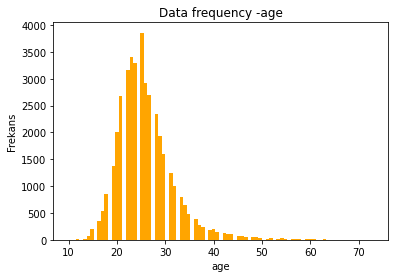

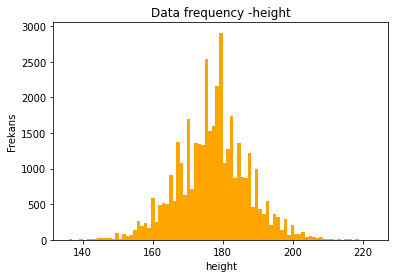

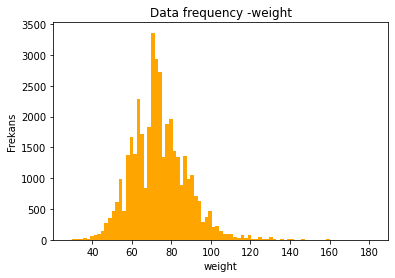

In [15]:
#Let's plot the histograms for all numerical variables.(Tüm sayısal değişkenler için histogramları çizelim.)
%matplotlib inline
numbers_variable=["age","height","weight"]
for i in numbers_variable:
  PlotHistogram(i)

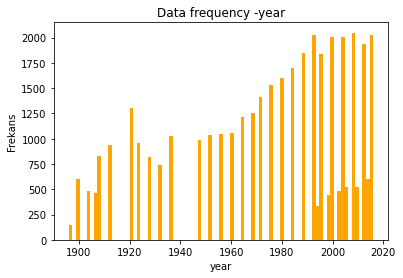

In [16]:
PlotHistogram("year")

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39783.0,25.918456,5.859569,10.0,22.0,25.00,29.0,73.0
height,39783.0,177.336690,10.170124,136.0,170.0,177.48,184.0,223.0
weight,39783.0,73.738320,13.979041,28.0,64.0,73.00,82.0,182.0
year,39783.0,1973.943845,33.822857,1896.0,1952.0,1984.00,2002.0,2016.0


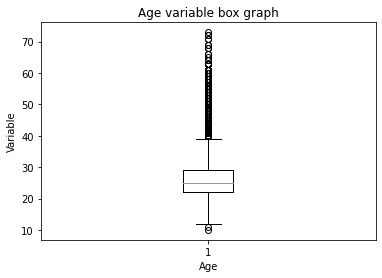

In [18]:
plt.boxplot(df.age)
plt.title("Age variable box graph")
plt.xlabel("Age")
plt.ylabel("Variable")
plt.show()

In [19]:
def plotBar(variable,n=5):
  """
    Input : Variable/columns name
    Output: Number of unique values ​​to display
  """
  df_=df[variable]
  data_count=df_.value_counts()
  data_count=data_count[:n]
  plt.figure()
  plt.bar(data_count.index,data_count,color="orange")
  plt.xticks(data_count.index,data_count.index.values)
  plt.xticks(rotation=45)
  plt.ylabel("Frekans")
  plt.title("Data frequency -{}".format(variable))
  plt.show()
  print("{} :\n {}".format(variable,data_count))

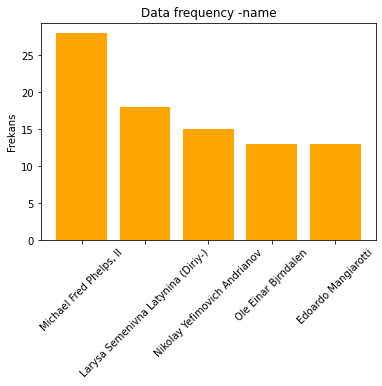

name :
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: name, dtype: int64


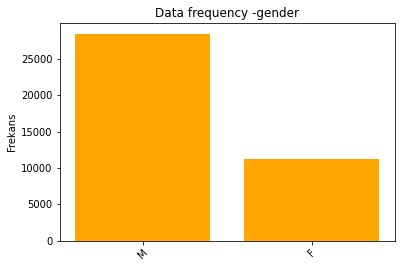

gender :
 M    28530
F    11253
Name: gender, dtype: int64


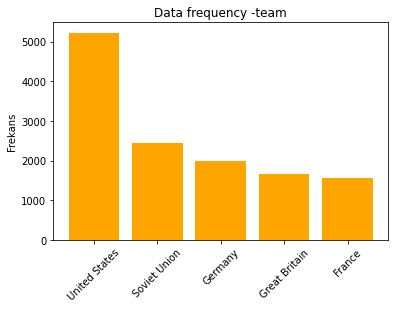

team :
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: team, dtype: int64


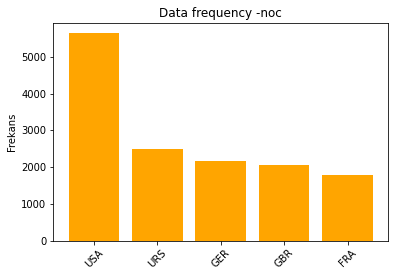

noc :
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: noc, dtype: int64


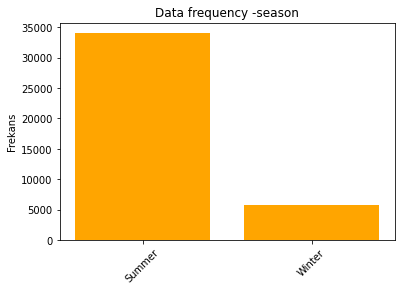

season :
 Summer    34088
Winter     5695
Name: season, dtype: int64


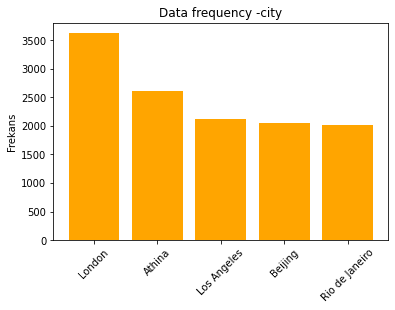

city :
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: city, dtype: int64


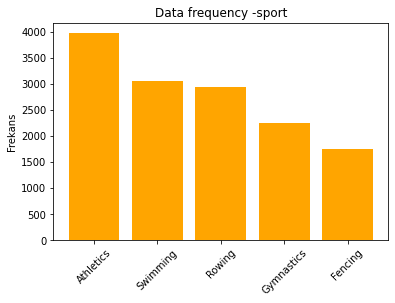

sport :
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: sport, dtype: int64


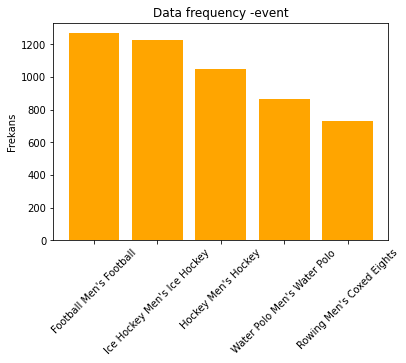

event :
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: event, dtype: int64


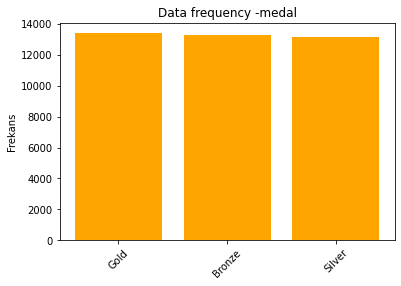

medal :
 Gold      13372
Bronze    13295
Silver    13116
Name: medal, dtype: int64


In [20]:
categorical_variable=["name","gender","team","noc","season","city","sport","event","medal"]
for i in categorical_variable:
  plotBar(i) 

In [21]:
male=df[df.gender=="M"]
male.head(3)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [22]:
female=df[df.gender=="F"]
female.head(3)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


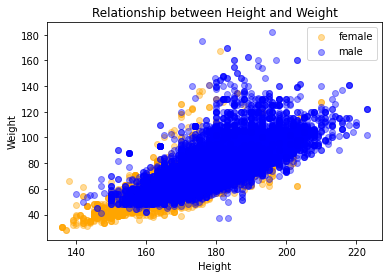

In [23]:
plt.figure()
plt.scatter(female.height,female.weight,alpha=0.4,label="female",color="orange")
plt.scatter(male.height,male.weight,alpha=0.4,label="male",color="b")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Relationship between Height and Weight")
plt.legend()
plt.show()

In [24]:
df.loc[:,["age","height","weight"]].corr() #correlation table(Korelasyon tablosu)

,age,height,weight
age,1.000000,0.061890,0.136349
height,0.061890,1.000000,0.794368
weight,0.136349,0.794368,1.000000


In [25]:
data_temporary=df.copy()
data_temporary=pd.get_dummies(data_temporary,columns=["medal"]) #sporcuları altın,gümüş ve bronz madalyaya göre ayıralım
                                                                #let's divide the athletes by gold, silver and bronze medals
data_temporary.head(2)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal_Bronze,medal_Gold,medal_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [26]:
data_temporary.loc[:,["age","medal_Bronze","medal_Gold","medal_Silver"]].corr()

,age,medal_Bronze,medal_Gold,medal_Silver
age,1.000000,-0.005584,-0.002576,0.008192
medal_Bronze,-0.005584,1.000000,-0.504110,-0.496859
medal_Gold,-0.002576,-0.504110,1.000000,-0.499022
medal_Silver,0.008192,-0.496859,-0.499022,1.000000


In [27]:
data_temporary[["team","medal_Bronze","medal_Gold","medal_Silver"]].groupby(["team"],as_index=False).sum().sort_values(by="medal_Gold",ascending=False)[:10]

,team,medal_Bronze,medal_Gold,medal_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


In [28]:
data_temporary[["city","medal_Bronze","medal_Gold","medal_Silver"]].groupby(["city"],as_index=False).sum().sort_values(by="medal_Gold",ascending=False)[:10]

,city,medal_Bronze,medal_Gold,medal_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


In [29]:
data_temporary[["gender","medal_Bronze","medal_Gold","medal_Silver"]].groupby(["gender"],as_index=False).sum().sort_values(by="medal_Gold",ascending=False)[:10]

,gender,medal_Bronze,medal_Gold,medal_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


In [30]:
data_pivot=df.pivot_table(index="medal",columns="gender",
                            values=["height","weight","age"],
                            aggfunc={"height":np.mean,"weight":np.mean,"age":[min,max,np.std]})
data_pivot.head()

age                    ...      height                 weight           
         max         min        ...        mean                   mean           
gender     F     M     F     M  ...           F           M          F          M
medal                           ...                                              
Bronze  69.0  72.0  12.0  10.0  ...  170.003227  180.045806  62.757125  77.841504
Gold    63.0  64.0  13.0  13.0  ...  170.448727  180.318906  63.199349  78.186505
Silver  55.0  73.0  11.0  13.0  ...  170.233783  180.053626  62.866892  77.960887

[3 rows x 10 columns]

In [31]:
def anomalyDetection(dframe,property):
  outlier_indices=[]
  for m in property:
    #1st quarter
    Q1=np.percentile(dframe[m],25)
    #3st quarter
    Q3=np.percentile(dframe[m],75)
    #IQR =Inter Quartile Range
    IQR=Q3-Q1
    #amount of additional steps for outlier(aykırı değer için ek adım miktarı)
    outlier_step=1.5*IQR
    #Let's detect the index where the outlier is found(aykırı değerin bulunduğu indeksi tespit edelim)
    outlier_list_col=df[(df[m]<Q1-outlier_step) | (df[m]>Q3+outlier_step)].index
    #let's store the detected indexes(tespit edilen indeksleri depolayalım)
    outlier_indices.extend(outlier_list_col)
  #Let's find unique outliers(eşsiz aykırı değerleri bulalım)
  outlier_indices=Counter(outlier_indices)
  #(Eğer bir örnek v adet sütunda farklı değer ise bunu aykırı kabul edelim.)
  #If an example has different values ​​in v columns, let's consider this as an outlier.
  multiplie_outliers=list(i for i,v in outlier_indices.items() if v > 1)
  return multiplie_outliers

In [32]:
data_anomaly=df.loc[anomalyDetection(df,["age","height","weight"])]
data_anomaly.sport.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: sport, dtype: int64

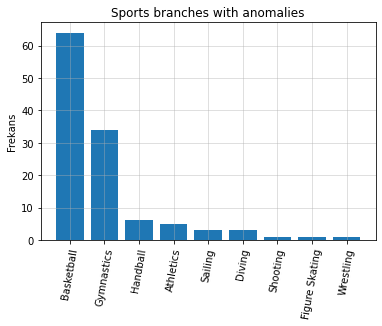

In [33]:
plt.figure()
plt.bar(data_anomaly.sport.value_counts().index,data_anomaly.sport.value_counts().values)
plt.xticks(rotation=80)
plt.title("Sports branches with anomalies")
plt.ylabel("Frekans")
plt.grid(True,alpha=0.5)
plt.show()

In [34]:
data_gym=data_anomaly[data_anomaly.sport=="Gymnastics"]
data_gym.head()

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold


In [35]:
data_anomaly.event.value_counts()

Basketball Men's Basketball                     62
Gymnastics Women's Team All-Around              21
Handball Men's Handball                          6
Gymnastics Women's Uneven Bars                   6
Gymnastics Women's Balance Beam                  3
Diving Women's Platform                          2
Basketball Women's Basketball                    2
Athletics Men's Hammer Throw                     2
Sailing Mixed Two Person Keelboat                2
Gymnastics Women's Floor Exercise                2
Athletics Men's Discus Throw                     2
Wrestling Men's Super-Heavyweight, Freestyle     1
Gymnastics Women's Horse Vault                   1
Shooting Men's Air Rifle, 10 metres              1
Figure Skating Women's Singles                   1
Gymnastics Women's Individual All-Around         1
Sailing Men's Two Person Keelboat                1
Athletics Men's 56-pound Weight Throw            1
Diving Women's Synchronized Platform             1
Name: event, dtype: int64

In [36]:
data_basketball=data_anomaly[data_anomaly.sport=="Basketball"]
data_basketball.head()

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [37]:
data_basketball.event.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: event, dtype: int64

In [38]:
data_time=df.copy()
data_time.head()

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [39]:
unique_years=data_time.year.unique()
unique_years

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [40]:
#Let's list the years of the Olympics(Olimpiyatların yapıldığı yılları sıralayalım)
train_array = np.sort(data_time.year.unique())
train_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

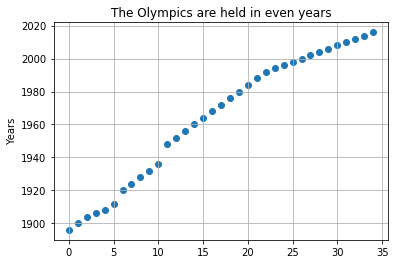

In [41]:
plt.figure()
plt.scatter(range(len(train_array)),train_array)
plt.grid(True)
plt.ylabel(" Years")
plt.title("The Olympics are held in even years")
plt.show()

In [42]:
#Veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürelim
#Let's convert the year values ​​in the data to datetime data type
datetime_object=pd.to_datetime(data_time["year"],format="%Y")
print(type(datetime_object))
datetime_object.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: year, dtype: datetime64[ns]

In [43]:
data_time["datetime"]=datetime_object
data_time.head(2)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal,datetime
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01


In [44]:
data_time=data_time.set_index("datetime")
data_time.drop(["year"],axis=1,inplace=True)
data_time.head(3)

,name,gender,age,height,weight,team,noc,season,city,sport,event,medal
datetime,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [45]:
periodic_data=data_time.resample("2A").mean()
periodic_data.head(5)

,age,height,weight
datetime,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [46]:
periodic_data.dropna(axis=0,inplace=True)
periodic_data.head(5)

,age,height,weight
datetime,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 432x288 with 0 Axes>

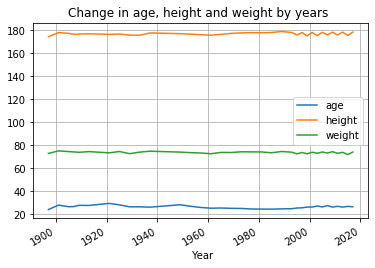

In [47]:
plt.figure()
periodic_data.plot()
plt.title("Change in age, height and weight by years ")
plt.xlabel(" Year")
plt.grid(True)
plt.show()

In [48]:
data_time=pd.get_dummies(data_time,columns=["medal"])
data_time.head(5)

,name,gender,age,height,weight,team,noc,season,city,sport,event,medal_Bronze,medal_Gold,medal_Silver
datetime,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [50]:
periodic_data=data_time.resample("2A").sum()
periodic_data.head()
periodic_data=periodic_data[~(periodic_data==0).any(axis=1)]
periodic_data.tail()

,age,height,weight,medal_Bronze,medal_Gold,medal_Silver
datetime,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

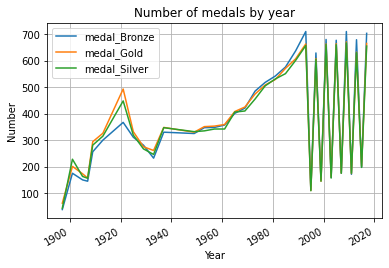

In [51]:
plt.figure()
periodic_data.loc[:,["medal_Bronze","medal_Gold","medal_Silver"]].plot()
plt.title("Number of medals by year")
plt.ylabel("Number")
plt.xlabel("Year")
plt.grid(True)
plt.show()


In [52]:
summer=data_time[data_time.season=="Summer"]
winter=data_time[data_time.season=="Winter"]
winter.head(3)

,name,gender,age,height,weight,team,noc,season,city,sport,event,medal_Bronze,medal_Gold,medal_Silver
datetime,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [54]:
periodic_data_winter=winter.resample("A").sum()
periodic_data_winter=periodic_data_winter[~(periodic_data_winter==0).any(axis=1)]
periodic_data_winter.head()

,age,height,weight,medal_Bronze,medal_Gold,medal_Silver
datetime,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [55]:
periodic_data_summer=summer.resample("A").sum()
periodic_data_summer=periodic_data_summer[~(periodic_data_summer==0).any(axis=1)]
periodic_data_summer.head()

,age,height,weight,medal_Bronze,medal_Gold,medal_Silver
datetime,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12127.56,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22907.96,146806.47,61262.24,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

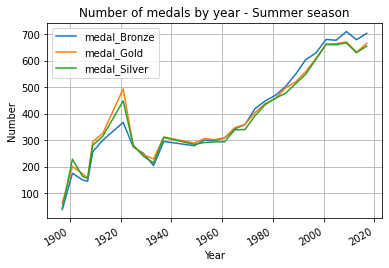

In [56]:
plt.figure()
periodic_data_summer.loc[:,["medal_Bronze","medal_Gold","medal_Silver"]].plot()
plt.title("Number of medals by year - Summer season")
plt.ylabel("Number")
plt.xlabel("Year")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

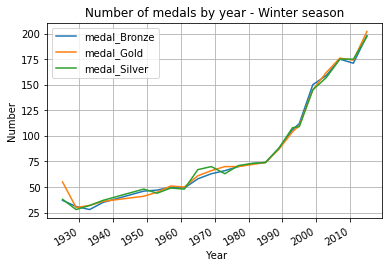

In [59]:
plt.figure()
periodic_data_winter.loc[:,["medal_Bronze","medal_Gold","medal_Silver"]].plot()
plt.title("Number of medals by year - Winter season")
plt.ylabel("Number")
plt.xlabel(" Year")
plt.grid(True)
plt.show()